Reseach Notebook to compare the odds off the main leagues over the years. 
The aim is to show which leagues are most unpredictable.

In [1]:
import pandas as pd
import numpy as np
import sys
import os
from os import listdir


pd.set_option('display.max_columns', 500)

os.chdir(os.getcwd().replace('notebooks',''))
import config as CONFIG

In [2]:
import config as CONFIG
import pickle

In [3]:
from src.data import *

In [4]:
df = pickle.load(open("data/raw/raw_database.sav", 'rb'))
df = df[~df.Date.isna()]
df.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,LBH,LBD,LBA,SJH,SJD,SJA,GBH,GBD,GBA,BSH,BSD,BSA,Referee,HFKC,AFKC,Season,PD,Away,Home,AG,Country,League,HG,PH,Res,PA
0,T1,05/08/2022,19:00,Istanbulspor,Trabzonspor,0,2,A,0.0,1.0,A,3.0,13.0,2.0,5.0,13.0,11.0,1.0,10.0,2.0,2.0,0.0,0.0,4.70,3.75,1.61,4.60,3.75,1.70,4.80,3.85,1.70,4.89,3.84,1.77,4.75,3.8,1.67,4.75,3.8,1.73,5.00,4.10,1.77,4.66,3.80,1.71,1.75,2.05,1.80,2.09,1.81,2.12,1.76,2.04,0.75,1.88,1.98,1.91,1.99,1.96,2.03,1.90,1.94,4.75,3.8,1.57,5.00,3.90,1.63,5.25,4.0,1.63,5.56,4.28,1.62,5.25,4.0,1.6,5.5,4.0,1.60,6.20,4.39,1.66,5.27,4.03,1.61,1.66,2.15,1.66,2.32,1.77,2.33,1.68,2.17,1.00,1.83,2.02,1.86,2.05,1.89,2.13,1.80,2.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,T1,06/08/2022,17:15,Sivasspor,Gaziantep,1,1,D,0.0,1.0,A,9.0,16.0,3.0,6.0,11.0,14.0,2.0,6.0,2.0,3.0,0.0,0.0,1.95,3.50,3.30,2.00,3.50,3.50,2.05,3.55,3.50,2.01,3.71,3.81,2.00,3.4,3.60,2.05,3.5,3.60,2.09,3.72,3.83,2.00,3.56,3.56,1.88,1.98,1.88,2.01,1.93,2.01,1.85,1.94,-0.50,2.02,1.83,2.01,1.89,2.09,1.89,2.01,1.83,2.15,3.4,3.00,2.20,3.25,3.20,2.30,3.4,3.10,2.21,3.51,3.45,2.20,3.3,3.2,2.2,3.4,3.25,2.30,3.70,3.62,2.22,3.38,3.19,1.95,1.90,1.97,1.92,1.99,1.96,1.93,1.86,-0.25,1.90,1.95,1.90,2.00,1.97,2.00,1.92,1.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,T1,06/08/2022,19:45,Besiktas,Kayserispor,1,0,H,0.0,0.0,D,20.0,5.0,6.0,1.0,22.0,14.0,9.0,4.0,5.0,2.0,1.0,1.0,1.50,4.33,5.25,1.51,4.20,5.75,1.53,4.30,6.00,1.52,4.60,6.44,1.47,4.2,6.50,1.50,4.2,6.50,1.55,4.70,6.50,1.50,4.39,6.04,1.70,2.10,1.71,2.23,1.83,2.23,1.71,2.12,-1.00,1.83,2.02,1.85,2.06,1.90,2.06,1.83,2.01,1.5,4.5,5.00,1.50,4.40,5.75,1.60,4.3,5.25,1.54,4.69,5.96,1.47,4.4,6.0,1.5,4.5,6.00,1.60,4.75,6.25,1.51,4.51,5.76,1.57,2.35,1.61,2.43,1.67,2.44,1.60,2.32,-1.00,1.83,2.02,1.85,2.07,1.95,2.08,1.83,2.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,T1,07/08/2022,17:15,Giresunspor,Ad. Demirspor,2,3,A,0.0,2.0,A,14.0,10.0,5.0,4.0,21.0,16.0,6.0,1.0,3.0,2.0,0.0,0.0,2.87,3.40,2.20,2.80,3.40,2.35,2.95,3.45,2.35,3.07,3.69,2.32,2.90,3.4,2.30,3.00,3.4,2.38,3.07,3.69,2.39,2.94,3.49,2.30,1.80,2.00,1.82,2.07,1.88,2.07,1.80,2.00,0.25,1.85,2.00,1.89,2.02,1.89,2.07,1.84,1.99,3.0,3.3,2.25,3.00,3.30,2.25,3.10,3.3,2.30,3.17,3.50,2.34,3.10,3.2,2.3,3.1,3.4,2.30,3.20,3.55,2.35,3.07,3.36,2.28,2.00,1.85,2.02,1.87,2.02,2.00,1.96,1.84,0.25,1.83,2.02,1.89,2.02,1.93,2.06,1.85,1.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,T1,07/08/2022,17:15,Karagumruk,Alanyaspor,2,4,A,0.0,2.0,A,17.0,10.0,4.0,6.0,19.0,19.0,10.0,3.0,2.0,3.0,0.0,0.0,2.55,3.50,2.40,2.60,3.30,2.55,2.65,3.45,2.55,2.72,3.66,2.59,2.62,3.4,2.55,2.70,3.4,2.55,2.73,3.66,2.60,2.65,3.46,2.53,1.75,2.05,1.80,2.09,1.88,2.09,1.79,2.02,0.00,1.98,1.88,2.00,1.91,2.02,1.91,1.96,1.87,2.25,3.5,2.75,2.35,3.40,2.80,2.35,3.5,2.85,2.33,3.70,3.05,2.25,3.4,3.0,2.3,3.5,3.

In [19]:
import pandas as pd
from datetime import datetime

# Define a function to convert the date string to a datetime object
def convert_date(date_str):
    try:
        return datetime.strptime(date_str, '%d/%m/%Y')
    except ValueError:
        return datetime.strptime(date_str, '%d/%m/%y')

# Convert the date column to datetime objects
df['date'] = df['Date'].apply(convert_date)

# Define a function to extract the quarter and year from a date
def get_quarter(date):
    quarter = (date.month - 1) // 3 + 1
    quarter_str = f"Q{quarter}"
    return f"{date.year} {quarter_str}"

# Define a function to extract the season from a date
def get_season(date):
    if date.month >= 8:
        return f'{date.year}-{date.year + 1}'
    else:
        return f'{date.year - 1}-{date.year}'

# Apply the functions to create the 'quarter' and 'season' columns
df['quater'] = df['date'].apply(get_quarter)
df['season'] = df['date'].apply(get_season)

# Print the DataFrame to see the updated columns
df.head()


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,LBH,LBD,LBA,SJH,SJD,SJA,GBH,GBD,GBA,BSH,BSD,BSA,Referee,HFKC,AFKC,Season,PD,Away,Home,AG,Country,League,HG,PH,Res,PA,date,quater,season
0,T1,05/08/2022,19:00,Istanbulspor,Trabzonspor,0,2,A,0.0,1.0,A,3.0,13.0,2.0,5.0,13.0,11.0,1.0,10.0,2.0,2.0,0.0,0.0,4.70,3.75,1.61,4.60,3.75,1.70,4.80,3.85,1.70,4.89,3.84,1.77,4.75,3.8,1.67,4.75,3.8,1.73,5.00,4.10,1.77,4.66,3.80,1.71,1.75,2.05,1.80,2.09,1.81,2.12,1.76,2.04,0.75,1.88,1.98,1.91,1.99,1.96,2.03,1.90,1.94,4.75,3.8,1.57,5.00,3.90,1.63,5.25,4.0,1.63,5.56,4.28,1.62,5.25,4.0,1.6,5.5,4.0,1.60,6.20,4.39,1.66,5.27,4.03,1.61,1.66,2.15,1.66,2.32,1.77,2.33,1.68,2.17,1.00,1.83,2.02,1.86,2.05,1.89,2.13,1.80,2.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-05,2022 Q3,2022-2023
1,T1,06/08/2022,17:15,Sivasspor,Gaziantep,1,1,D,0.0,1.0,A,9.0,16.0,3.0,6.0,11.0,14.0,2.0,6.0,2.0,3.0,0.0,0.0,1.95,3.50,3.30,2.00,3.50,3.50,2.05,3.55,3.50,2.01,3.71,3.81,2.00,3.4,3.60,2.05,3.5,3.60,2.09,3.72,3.83,2.00,3.56,3.56,1.88,1.98,1.88,2.01,1.93,2.01,1.85,1.94,-0.50,2.02,1.83,2.01,1.89,2.09,1.89,2.01,1.83,2.15,3.4,3.00,2.20,3.25,3.20,2.30,3.4,3.10,2.21,3.51,3.45,2.20,3.3,3.2,2.2,3.4,3.25,2.30,3.70,3.62,2.22,3.38,3.19,1.95,1.90,1.97,1.92,1.99,1.96,1.93,1.86,-0.25,1.90,1.95,1.90,2.00,1.97,2.00,1.92,1.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-06,2022 Q3,2022-2023
2,T1,06/08/2022,19:45,Besiktas,Kayserispor,1,0,H,0.0,0.0,D,20.0,5.0,6.0,1.0,22.0,14.0,9.0,4.0,5.0,2.0,1.0,1.0,1.50,4.33,5.25,1.51,4.20,5.75,1.53,4.30,6.00,1.52,4.60,6.44,1.47,4.2,6.50,1.50,4.2,6.50,1.55,4.70,6.50,1.50,4.39,6.04,1.70,2.10,1.71,2.23,1.83,2.23,1.71,2.12,-1.00,1.83,2.02,1.85,2.06,1.90,2.06,1.83,2.01,1.5,4.5,5.00,1.50,4.40,5.75,1.60,4.3,5.25,1.54,4.69,5.96,1.47,4.4,6.0,1.5,4.5,6.00,1.60,4.75,6.25,1.51,4.51,5.76,1.57,2.35,1.61,2.43,1.67,2.44,1.60,2.32,-1.00,1.83,2.02,1.85,2.07,1.95,2.08,1.83,2.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-06,2022 Q3,2022-2023
3,T1,07/08/2022,17:15,Giresunspor,Ad. Demirspor,2,3,A,0.0,2.0,A,14.0,10.0,5.0,4.0,21.0,16.0,6.0,1.0,3.0,2.0,0.0,0.0,2.87,3.40,2.20,2.80,3.40,2.35,2.95,3.45,2.35,3.07,3.69,2.32,2.90,3.4,2.30,3.00,3.4,2.38,3.07,3.69,2.39,2.94,3.49,2.30,1.80,2.00,1.82,2.07,1.88,2.07,1.80,2.00,0.25,1.85,2.00,1.89,2.02,1.89,2.07,1.84,1.99,3.0,3.3,2.25,3.00,3.30,2.25,3.10,3.3,2.30,3.17,3.50,2.34,3.10,3.2,2.3,3.1,3.4,2.30,3.20,3.55,2.35,3.07,3.36,2.28,2.00,1.85,2.02,1.87,2.02,2.00,1.96,1.84,0.25,1.83,2.02,1.89,2.02,1.93,2.06,1.85,1.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-07,2022 Q3,2022-2023
4,T1,07/08/2022,17:15,Karagumruk,Alanyaspor,2,4,A,0.0,2.0,A,17.0,10.0,4.0,6.0,19.0,19.0,10.0,3.0,2.0,3.0,0.0,0.0,2.55,3.50,2.40,2.60,3.30,2.55,2.65,3.45,2.55,2.72,3.66,2.59,2.62,3.4,2.55,2.70,3.4,2.55,2.73,3.66,2.60,2.65,3.46,2.53,1.75,2.05,1.80,2.09,1.88,2.09,1

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.lines import Line2D

def plot_stylish(data, title, ylabel):
    sns.set_style('darkgrid')  # Set the style to darkgrid for a dark background
    fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and axis
    fig.patch.set_facecolor('black')  # Set the background color of the figure to black

    # Define a distinct color palette with white and a darker shade of green
    colors = ['#FFFFFF', '#006400', '#808080', '#228B22', '#2E8B57']
    colors = ['#000000', '#006400', '#808080', '#228B22', '#2E8B57']

    handles = []  # Empty list to store legend handles

    for i, series in enumerate(data):
        line = sns.lineplot(data=series, linewidth=2, color=colors[i % len(colors)])
        handles.append(Line2D([0], [0], color=colors[i % len(colors)], linewidth=2))  # Add proxy artist to handles

    # Set the X and Y labels with stylish font properties
    font_labels = FontProperties(family='Arial', size=12, weight='bold', style='italic')
    ax.set_xlabel('Season', fontproperties=font_labels, fontsize=12, color='#CCCCCC')
    ax.set_ylabel(ylabel, fontproperties=font_labels, fontsize=12, color='#CCCCCC')

    # Set the title with stylish font properties
    font_title = FontProperties(family='Arial', size=16, weight='bold', style='italic')
    ax.set_title(title, fontproperties=font_title, fontsize=16, pad=20, color='#CCCCCC')

    ax.tick_params(labelsize=10, colors='#CCCCCC')  # Set the tick labels with a smaller font size and lighter color
    sns.despine()  # Remove the spines of the plot for a clean look

    plt.tight_layout()  # Adjust the layout for better spacing
    plt.xticks(rotation=45, ha='right', color='#CCCCCC')  # Rotate x-axis tick labels by 45 degrees and align them to the right

    # Create a legend with the series names using proxy artists
    ax.legend(handles, [series.name for series in data], prop=font_labels, loc='upper right')

    plt.show()


In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.lines import Line2D

def plot_stylish(data, title, ylabel):
    sns.set_style('white')  # Set the style to white
    fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and axis
    fig.patch.set_facecolor('white')  # Set the background color of the figure to white

    # Define a distinct color palette with shades of green and gray
    colors = ['#008080', '#808080', '#228B22', '#2E8B57']
    
    handles = []  # Empty list to store legend handles

    for i, series in enumerate(data):
        line = sns.lineplot(data=series, linewidth=2, color=colors[i % len(colors)])
        handles.append(Line2D([0], [0], color=colors[i % len(colors)], linewidth=2))  # Add proxy artist to handles

    # Set the X and Y labels with stylish font properties
    font_labels = FontProperties(family='Arial', size=12, weight='bold', style='italic')
    ax.set_xlabel('Season', fontproperties=font_labels, fontsize=12, color='#333333')
    ax.set_ylabel(ylabel, fontproperties=font_labels, fontsize=12, color='#333333')

    # Set the title with stylish font properties
    font_title = FontProperties(family='Arial', size=16, weight='bold', style='italic')
    ax.set_title(title, fontproperties=font_title, fontsize=16, pad=20, color='#333333')

    ax.tick_params(labelsize=10, colors='#333333')  # Set the tick labels with a smaller font size and color
    sns.despine()  # Remove the spines of the plot

    plt.tight_layout()  # Adjust the layout for better spacing

    # Customize the x-axis tick labels
    labels = [label.replace('Q1','') if label.endswith('Q1') else '' for label in data[0].index]
    ax.set_xticks(range(len(data[0].index)))
    ax.set_xticklabels(labels, rotation=0, ha='center', color='#333333')

    # Add horizontal grid lines without dots
    ax.yaxis.grid(color='lightgray', linestyle='-', linewidth=0.5)

    # Add vertical grid lines only where the x-axis has a label
    for i, label in enumerate(labels):
        if label != '':
            ax.axvline(i, color='lightgray', linestyle='-', linewidth=0.5, zorder=-1)
           # ax.text(i, -0.075, label, transform=ax.get_xaxis_transform(), ha='center', color='#333333')

    # Create a legend with the series names using proxy artists
    ax.legend(handles, [series.name for series in data], prop=font_labels, loc='upper right')

    plt.show()


## Facts
Home Teams tend to win more games than away teams. And the bookies believe that too.

- b365 changes calc during corona
- home odds increase so they are less likley
- something happens in corona
- 3 Quarter Downer


In [78]:
df_grouped_mean = df.groupby(["quater"]).mean()

- Inter Wetten with lowest Odds
- since corona almost the same like B365
- Peaks and Downs -> Are there times when teams are better at home? when?
  - 2Q weak , 3Q strong -> how right are the predicitons here?
- trend is rising -> home advantage disappearing
- corona the pure influence without crowd?  

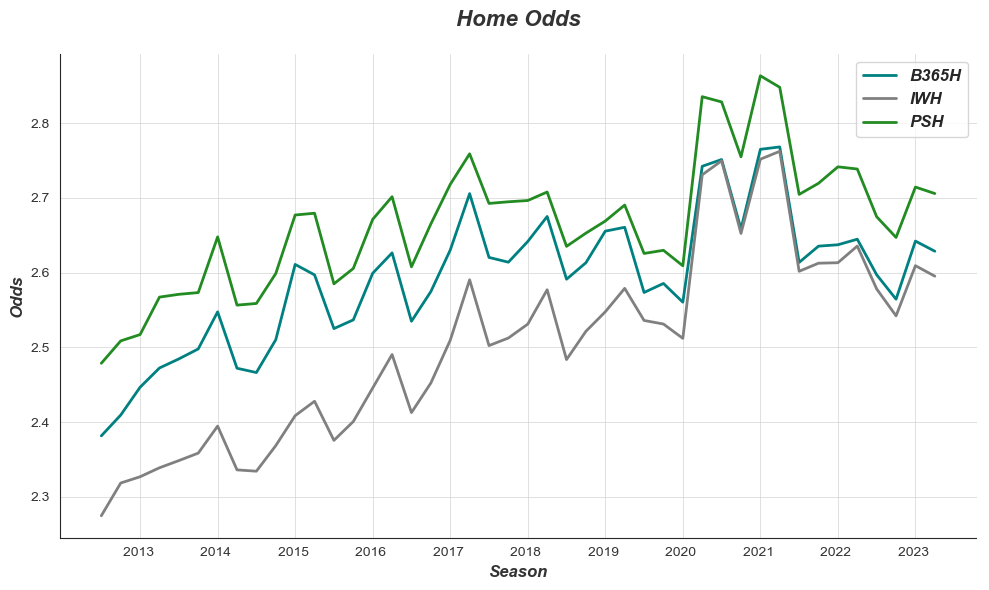

In [79]:
plot_stylish([df_grouped_mean["B365H"],df_grouped_mean["IWH"],df_grouped_mean["PSH"]], title='Home Odds', ylabel='Odds')

- since corona inter weten and B365 look a like
- peaks in q2 and downs in q3 ?
- between 2017 and 2020 the away teams become weaker

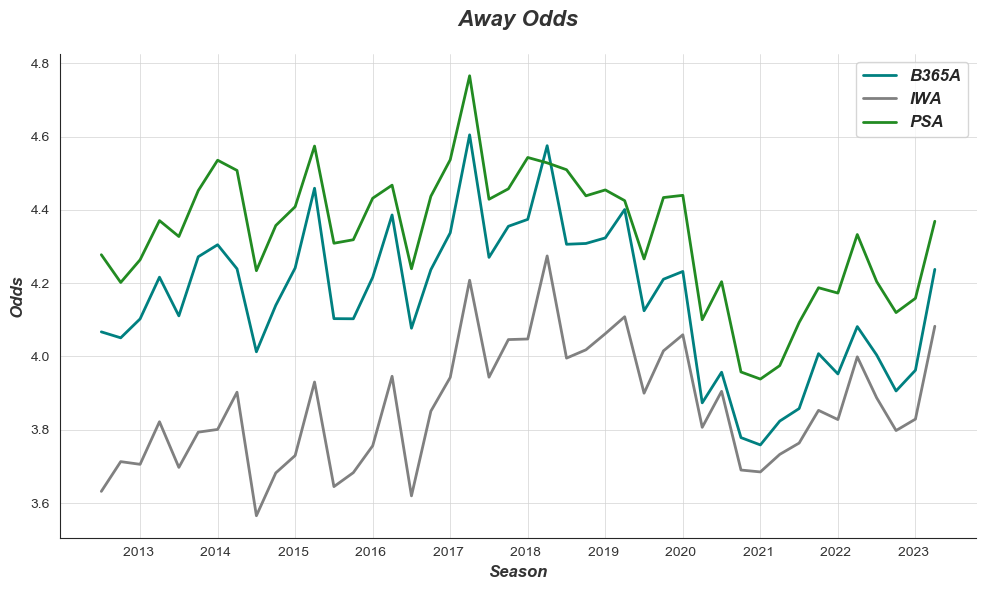

In [80]:

plot_stylish([df_grouped_mean["B365A"],df_grouped_mean["IWA"],df_grouped_mean["PSA"]], title='Away Odds', ylabel='Odds')

- increases over the years
- 2Q Highs, 3Q Downs

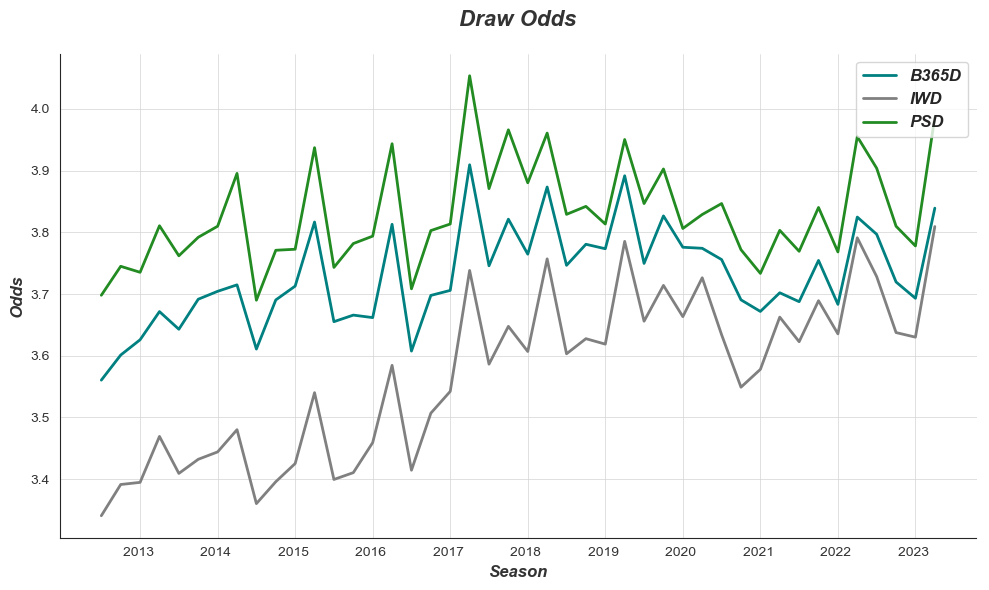

In [81]:
plot_stylish([df_grouped_mean["B365D"],df_grouped_mean["IWD"],df_grouped_mean["PSD"]], title='Draw Odds', ylabel='Odds')

Questions and further
- why are the peaks the same? why is no event becoming more likely?

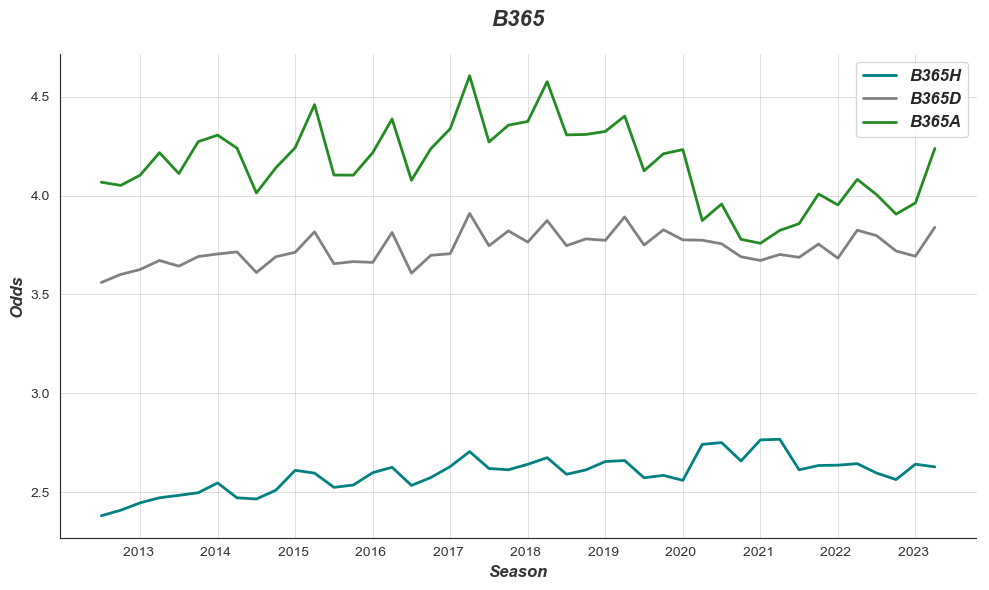

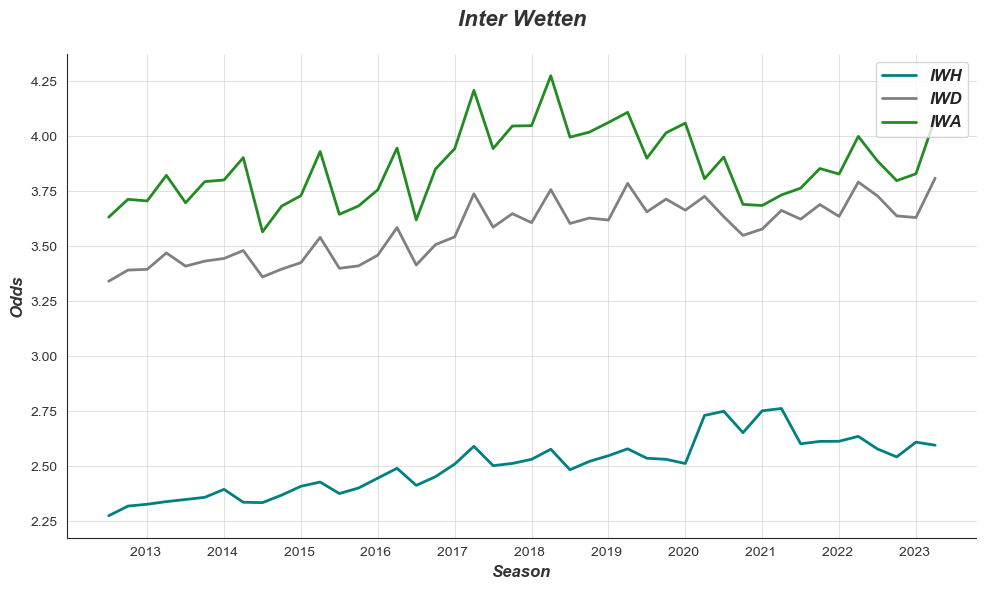

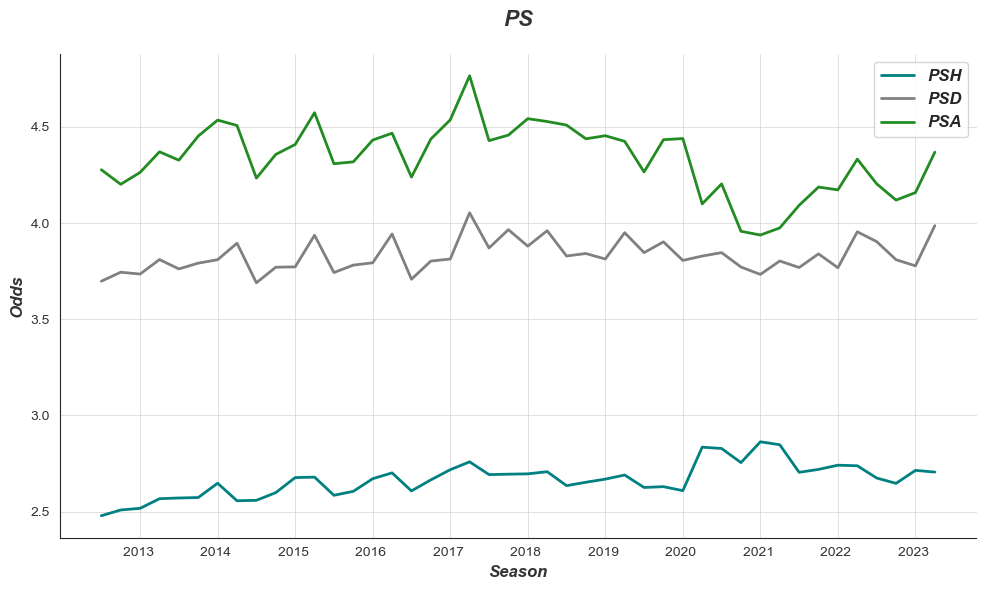

In [77]:
plot_stylish([df_grouped_mean["B365H"],df_grouped_mean["B365D"],df_grouped_mean["B365A"]], title='B365', ylabel='Odds')
plot_stylish([df_grouped_mean["IWH"],df_grouped_mean["IWD"],df_grouped_mean["IWA"]], title='Inter Wetten', ylabel='Odds')
plot_stylish([df_grouped_mean["PSH"],df_grouped_mean["PSD"],df_grouped_mean["PSA"]], title='PS', ylabel='Odds')


## Calculate Home Advantage

Question: How much Home Advantage is in the odd?

"Home Advantage is when you win or dont lose a game because of your fans"

In [282]:
df.season

0      2022-2023
1      2022-2023
2      2022-2023
3      2022-2023
4      2022-2023
         ...    
235    2012-2013
236    2012-2013
237    2012-2013
238    2012-2013
239    2012-2013
Name: season, Length: 73209, dtype: object

In [283]:
df_season = df[df.season=="2022-2023"]

In [288]:
# Against all odds
underdog_ratio = lambda x: sum((x.PSH > x.PSA) & ((x.FTR == "H") | (x.FTR == "D"))) / sum(x.PSH > x.PSA)
favorite_ratio = lambda x: sum((x.PSH < x.PSA) & ((x.FTR == "H") | (x.FTR == "D"))) / sum(x.PSH < x.PSA)


In [290]:
set(df.season)

{'2011-2012',
 '2012-2013',
 '2013-2014',
 '2014-2015',
 '2015-2016',
 '2016-2017',
 '2017-2018',
 '2018-2019',
 '2019-2020',
 '2020-2021',
 '2021-2022',
 '2022-2023'}

In [310]:
ratios = dict()
for s in set(df.season):
    df_season = df[df.season==s]
    ratios[s] = [underdog_ratio(df_season),
    favorite_ratio(df_season)]

In [318]:
pd.DataFrame(ratios).T.sort_index().to_csv("ratio.csv")

In [267]:
# Favorite
sum((df.PSH < df.PSA) & ((df.FTR ==  "D")|(df.FTR ==  "H")))/sum(df.PSH < df.PSA)

0.7770649095428009

In [ ]:
sum((df.PSH > df.PSA) & (df.FTR == "H"))

In [ ]:
sum(df.PSH > df.PSA)

In [ ]:
 sum(df.FTR == "H")/ sum( (df.FTR == "H")+ (df.FTR == "A"))

In [ ]:
def calculate_home_advantage(home_odd, draw_odd, away_odd):
    neutral_odd = (home_odd + draw_odd + away_odd) / 3
    home_advantage_factor = neutral_odd / home_odd
    return home_advantage_factor


In [ ]:
calculate_home_advantage(home_odd = 2.4, draw_odd = 5, away_odd = 20)

In [ ]:
def calculate_home_advantage(row, home_odd_col, draw_odd_col, away_odd_col):
    """
    Calculate the home advantage factor based on odds in a row of a DataFrame.

    Args:
        row (pandas.Series): A row of a DataFrame containing odds.
        home_odd_col (str): Column name for the home odds.
        draw_odd_col (str): Column name for the draw odds.
        away_odd_col (str): Column name for the away odds.

    Returns:
        float: The home advantage factor.

    """
    row = row.fillna(1)
    home_odd = row[home_odd_col]
    draw_odd = row[draw_odd_col]
    away_odd = row[away_odd_col]
    if home_odd >0:
        home_advantage_factor = (draw_odd - away_odd) / home_odd
    else:
         home_advantage_factor = 0
    return home_advantage_factor

# Adjust the column names accordingly
home_odd_col = 'PSH'
draw_odd_col = 'PSD'
away_odd_col = 'PSA'

df['PSH_home_advantage'] = df.apply(lambda row: calculate_home_advantage(row, "PSH", "PSD", "PSA"), axis=1)
df['IW_home_advantage'] = df.apply(lambda row: calculate_home_advantage(row, "IWH", "IWD", "IWA"), axis=1)
df['B365_home_advantage'] = df.apply(lambda row: calculate_home_advantage(row, "B365H", "B365D", "B365A"), axis=1)


In [ ]:
# Adjust the column names accordingly
home_odd_col = 'PSH'
draw_odd_col = 'PSD'
away_odd_col = 'PSA'

df['PSH_home_advantage'] = ((df[draw_odd_col] - df[away_odd_col]) / df[home_odd_col]).fillna(0)
df['IW_home_advantage'] = ((df['IWD'] - df['IWA']) / df['IWH']).fillna(0)
df['B365_home_advantage'] = ((df['B365D'] - df['B365A']) / df['B365H']).fillna(0)


In [ ]:
df_grouped_mean = df.groupby(["quater"]).mean()

In [ ]:
plot_stylish([df_grouped_mean["B365_home_advantage"],df_grouped_mean["PSH_home_advantage"],df_grouped_mean["IW_home_advantage"]], title='Home Advantage', ylabel='Odds')

In [ ]:
plot_stylish([df_grouped_mean["B365_home_advantage"],df_grouped_mean["PSH_home_advantage"],df_grouped_mean["IW_home_advantage"]], title='Home Advantage', ylabel='Odds')

In [ ]:
df['diff_goals'] = df.FTHG-df.FTAG
df = df.fillna(0)
df_league = df[df.Div == "D1"]


df_league = df_league.groupby(["HomeTeam"]).mean()

columns_advantage = [i for i in df_league.columns if i.endswith('home_advantage')]
df_league.sort_values("PSH_home_advantage",ascending = False)

In [ ]:
((df_league.B365A/df_league.B365D)-df_league.B365H).sort_values()


from sklearn.preprocessing import MinMaxScaler

# Assuming you have a DataFrame named df with the measure column "Home Advantage"
measure_values = ((df_league.B365A/df_league.B365D)-df_league.B365H).values.reshape(-1, 1)

# Create an instance of MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the measure values using the scaler
scaled_values = scaler.fit_transform(measure_values)

measure_values = pd.Series([i[0] for i in scaled_values],index = df_league.index)

# Assign the scaled values to a new column in the DataFrame
df_league['Scaled Home Advantage'] = scaled_values

measure_values.hist()

In [ ]:
df_league = df_league.groupby(["HomeTeam"]).mean()
(df_league.B365A/df_league.B365D)*(df_league.FTHG-df_league.FTAG).sort_values(ascending=False)

In [ ]:
(df_league.IWD - df_league.IWH).sort_values()

In [ ]:
(df_league.FTHG-df_league.FTAG).sort_values(ascending=False)

In [ ]:
((df_league.B365A + df_league.B365H )/2-(df_league.B365D)).sort_values()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have the DataFrame named df_concat
df_concat = pd.concat([(df_league.FTHG - df_league.FTAG).sort_values(ascending=False),
                       (df_league.B365A - df_league.B365H).sort_values(ascending=False)],
                      axis=1)

# Set the column names for clarity
df_concat.columns = ['Home Shots on Target - Away Shots on Target', 'B365 Away Odds - B365 Home Odds']

# Create the scatter plot
plt.scatter(df_concat['Home Shots on Target - Away Shots on Target'],
            df_concat['B365 Away Odds - B365 Home Odds'],
            alpha=0.5)

# Add text annotations for each data point
for i, row in df_concat.iterrows():
    x = row['Home Shots on Target - Away Shots on Target']
    y = row['B365 Away Odds - B365 Home Odds']
    label = i  # Use the index name as the label
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(5, 5), ha='left', va='bottom')

# Set the labels and title
plt.xlabel('Home Shots on Target - Away Shots on Target')
plt.ylabel('B365 Away Odds - B365 Home Odds')
plt.title('Scatter Plot')

# Display the plot
plt.show()


In [ ]:
a = ['AEK', 'AFC Wimbledon', 'AZ Alkmaar', 'Aalen', 'Aberdeen', 'Academica', 'Accrington', 'Ad. Demirspor', 'Adanaspor']
b = ['Athen', 'Wimbledon', 'AZA', 'RSV Aalen', 'Aberdeen FC', 'Academica Blanca', 'Accrington', 'Ademjan Demirspor', 'Adanaspor T1']

matches = []
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

for team_a in a:
    best_match = process.extractOne(team_a, b, scorer=fuzz.token_sort_ratio)
    matched_team_a = team_a
    matched_team_b = best_match[0]
    matches.append((matched_team_a, matched_team_b))

In [ ]:
s